<a href="https://colab.research.google.com/github/BohdanShepel2005/Mashynne-Navchannya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%B7_%D0%9C%D0%9D_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
# : Завантажую датасет
print(" Завантажую CSV-файлу:")
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))


 Завантажую CSV-файлу:


Saving breast-cancer.csv to breast-cancer (1).csv


In [6]:
# №1: Опис датасету Breast Cancer
print("\n№1 Опис датасету Breast Cancer:")
print(f"""
 Завдання: Класифікація пухлини як доброякісної (0 – benign) чи злоякісної (1 – malignant)
 Кількість зразків: {df.shape[0]}
 Кількість ознак: {df.shape[1] - 1}
 Формат: CSV-файл, що містить ознаки та цільову змінну
""")



№1 Опис датасету Breast Cancer:

 Завдання: Класифікація пухлини як доброякісної (0 – benign) чи злоякісної (1 – malignant)
 Кількість зразків: 569
 Кількість ознак: 31
 Формат: CSV-файл, що містить ознаки та цільову змінну



In [7]:
# №2: Проводжу попередній аналіз
print("№2 Попередній аналіз")


№2 Попередній аналіз


In [8]:
# 2.1 Виводжу перші 5 рядків
print("\n2.1 Перші 5 рядків:")
display(df.head())



2.1 Перші 5 рядків:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# 2.2 Перевіряю назви стовпців і типи даних
print("\n2.2 Назви стовпців і типи даних:")
print(df.dtypes)



2.2 Назви стовпців і типи даних:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst    

In [10]:
# 2.3 Перевіряю пропущені значення
print("\n2.3 Перевірка на пропущені значення:")
print(df.isnull().sum())



2.3 Перевірка на пропущені значення:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [11]:
# 2.4 Визначаю розмір датасету
print("\n2.4 Розмір:", df.shape)


2.4 Розмір: (569, 32)


In [12]:
# №3: Проводжу масштабування ознак
print("\n№3 Масштабування ознак")

# Автоматично визначаю цільову змінну
possible_targets = ['target', 'diagnosis', 'label', 'class', 'outcome']
target_column = None

for col in possible_targets:
    if col in df.columns:
        target_column = col
        break

if not target_column:
    raise ValueError(" Не знайдено цільову змінну. Перевір назви колонок у CSV-файлі.")

print(f"Цільова змінна виявлена: '{target_column}'")

# Виконую масштабування
X = df.drop(columns=[target_column])
y = df[target_column]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




№3 Масштабування ознак
Цільова змінна виявлена: 'diagnosis'


In [13]:
# №4: Поділ на тренувальні і тестові вибірки
print("\n№4 Поділ на вибірки")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")



№4 Поділ на вибірки
X_train: (455, 31), X_test: (114, 31)


In [14]:
# №5: Будую моделі і підбираю параметри
print("\n№5 Побудова моделей та GridSearchCV")

# Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr_cv = GridSearchCV(lr, lr_params, cv=5)
lr_cv.fit(X_train, y_train)

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree_params = {'max_depth': [3, 5, 10, None]}
tree_cv = GridSearchCV(tree, tree_params, cv=5)
tree_cv.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
rf_cv = GridSearchCV(rf, rf_params, cv=5)
rf_cv.fit(X_train, y_train)


№5 Побудова моделей та GridSearchCV


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [50, 100, 200]})


№6 Оцінка моделей

--- Logistic Regression ---
Точність (Accuracy): 0.9736842105263158
Найкращі параметри: {'C': 10}
Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



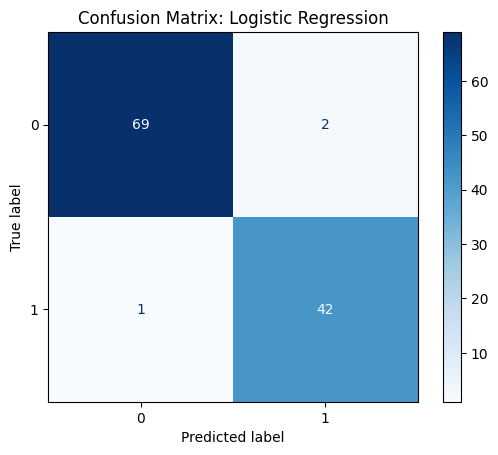


--- Decision Tree ---
Точність (Accuracy): 0.9473684210526315
Найкращі параметри: {'max_depth': 3}
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



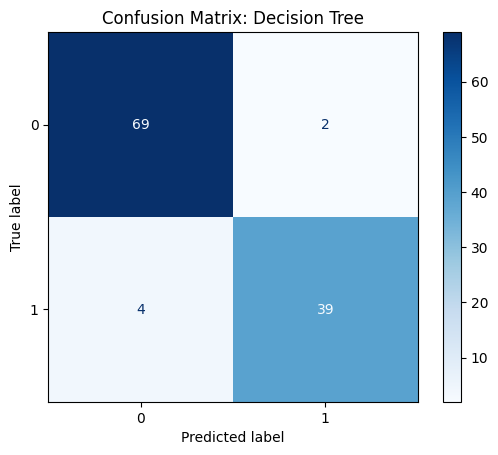


--- Random Forest ---
Точність (Accuracy): 0.9649122807017544
Найкращі параметри: {'max_depth': 10, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



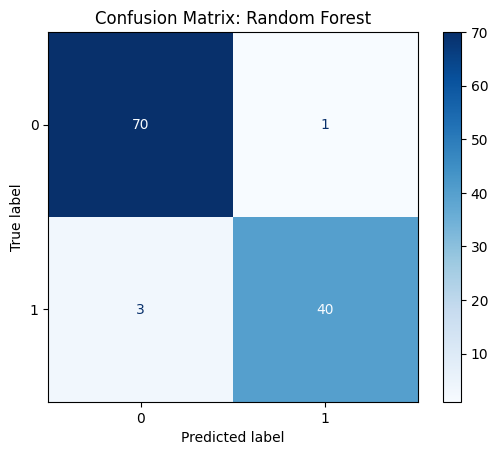

In [15]:
# №6: Оцінюю моделі
print("\n№6 Оцінка моделей")

models = {
    "Logistic Regression": lr_cv,
    "Decision Tree": tree_cv,
    "Random Forest": rf_cv
}

accuracies = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    print(f"\n--- {name} ---")
    print("Точність (Accuracy):", acc)
    print("Найкращі параметри:", model.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [16]:
# №7: Отримую результати
print("\n№7 Прогнозування і результати")

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
final_preds = best_model.predict(X_test)

print(f"\n Найкраща модель: {best_model_name}")
results = pd.DataFrame({
    'Справжнє значення': y_test.values,
    'Прогноз': final_preds
})
display(results.head(10))


№7 Прогнозування і результати

 Найкраща модель: Logistic Regression


,Справжнє значення,Прогноз
0,B,B
1,M,M
2,M,M
3,B,B
4,B,B
5,M,M
6,M,M
7,M,M
8,B,M
9,B,B


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Справжнє значення').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Прогноз').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Прогноз'].value_counts()
    for x_label, grp in _df_2.groupby('Справжнє значення')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Справжнє значення')
_ = plt.ylabel('Прогноз')

In [17]:
# №8: ВИСНОВКИ
print("\n№8 ВИСНОВКИ:")
print(f"""
 Я завантажив датасет про пухлини молочної залози (Breast Cancer) з  Kaggle та провів попередній аналіз даних.
Спочатку я переглянув перші рядки, перевірив типи даних і переконався, що в датасеті немає пропущених значень.
Далі я застосував масштабування ознак за допомогою StandardScaler, щоб привести всі значення до єдиного масштабу.
Потім дані було поділено на тренувальну та тестову вибірки у співвідношенні 80/20. Щоб побудувати моделя я зробив так
Логістичну регресію Дерево рішень Random Forest
Далі я налаштував кожну модель за допомогою GridSearchCV, щоб знайти найкращі гіперпараметри.
потім я протестував на тестовій вибірці і побудував графіки.
""")


№8 ВИСНОВКИ:

 Я завантажив датасет про пухлини молочної залози (Breast Cancer) з  Kaggle та провів попередній аналіз даних.
Спочатку я переглянув перші рядки, перевірив типи даних і переконався, що в датасеті немає пропущених значень.
Далі я застосував масштабування ознак за допомогою StandardScaler, щоб привести всі значення до єдиного масштабу. 
Потім дані було поділено на тренувальну та тестову вибірки у співвідношенні 80/20. Щоб побудувати моделя я зробив так 
Логістичну регресію Дерево рішень Random Forest 
Далі я налаштував кожну модель за допомогою GridSearchCV, щоб знайти найкращі гіперпараметри.
потім я протестував на тестовій вибірці і побудував графіки.

